In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from tensorflow import keras

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


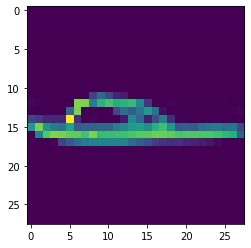

In [ ]:
plt.imshow(train_images[30])

In [ ]:
result = [[None for _ in range(3)]for _ in range(3)]

In [ ]:
result

[[None, None, None], [None, None, None], [None, None, None]]

In [ ]:
for  i in range (14,17):
  for j in range(0,3):
    result[i-14][j] = train_images[30][i][j]

In [ ]:
result

[[51, 43, 27], [137, 202, 133], [0, 110, 186]]

In [ ]:
filter = [
          [-1,0,1],
          [-2,0,2],
          [-1,0,1]
]

In [ ]:
aSum = 0
for i in range(3):
  for j in range(3):
    aSum += filter[i][j] * result[i][j]

In [ ]:
aSum

154

In [ ]:
link = "https://cdn.shopify.com/s/files/1/1297/3303/products/20-vinyl-roll-up-chess-board-21184102209_grande.jpg?v=1575932012"

In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=fba7321f8b2b43421b094d17cdc1ab6af187c82efa57aaa20caa9b269c899672
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import wget # thư viện dowload define bất kì về máy

In [ ]:
wget.download(link)

'20-vinyl-roll-up-chess-board-21184102209_grande.jpg'

In [ ]:
import cv2 #opencv

In [ ]:
image = cv2.imread('20-vinyl-roll-up-chess-board-21184102209_grande.jpg')
image

array([[[187, 186, 190],
        [203, 202, 206],
        [190, 189, 193],
        ...,
        [ 34,  31,  33],
        [ 35,  32,  34],
        [ 36,  33,  35]],

       [[198, 197, 201],
        [213, 212, 216],
        [201, 200, 204],
        ...,
        [ 33,  30,  32],
        [ 34,  31,  33],
        [ 35,  32,  34]],

       [[186, 185, 189],
        [201, 200, 204],
        [189, 188, 192],
        ...,
        [ 31,  28,  30],
        [ 32,  29,  31],
        [ 33,  30,  32]],

       ...,

       [[211, 210, 214],
        [236, 235, 239],
        [220, 219, 223],
        ...,
        [213, 209, 214],
        [217, 213, 218],
        [223, 219, 224]],

       [[214, 213, 217],
        [239, 238, 242],
        [223, 222, 226],
        ...,
        [221, 217, 222],
        [224, 220, 225],
        [231, 227, 232]],

       [[217, 216, 220],
        [242, 241, 245],
        [226, 225, 229],
        ...,
        [227, 223, 228],
        [230, 226, 231],
        [237, 233, 238]]

In [ ]:
grey = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

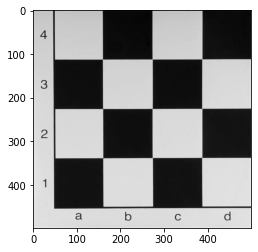

In [ ]:
import matplotlib.pyplot as plt

plt.gray()
plt.imshow(grey)

In [ ]:
filter = [
          [-1,0,1],
          [-2,0,2],
          [-1,0,1]
]

In [ ]:
m = len(grey)
n = len(grey[0])

In [ ]:
print(m)
print(n) # vkisch thuoc buc anh

499
500


In [ ]:
import numpy as np
transformed = np.copy(grey)

In [ ]:
for i in range(1,m-1):
  for j in range(1,n-1):
    center_pixel = (i,j)
    center_filter = (1,1)
    xs = [1,1,1,-1,-1,-1,0,0]
    ys = [1,-1,0,0,-1,1,-1,1]

    for k in range(8):
      new_x = center_pixel[0]+xs[k]  # tifm toa độ xung quanh bức ảnh
      new_y = center_pixel[1]+ys[k]

      #TỌA ĐỘ FILTER
      filter_new_x = center_filter[0] + xs[k]
      filter_new_y = center_filter[1] + ys[k]

      #gía trị của tổng tất cả phép nhân

      new_val = grey[new_x][new_y] * filter[filter_new_x][filter_new_y]
      # nhân 8 điểm trước rồi nhân ở giữa.
    new_val += grey[i][j] * filter[1][1]  
    transformed[i][j] = new_val

    if new_val < 0 :
      new_val = 0

    if new_val > 255.0:
      new_val = 255.0

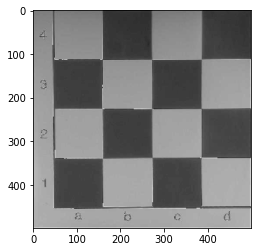

In [ ]:
plt.imshow(transformed)